In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/DL/Concrete_Data.xls")

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
# feature and target
# train test split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
# scaling

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
# Neural network

model = Sequential()

model.add(Dense(16, activation="tanh", input_dim=8))
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd", loss="mse")

In [ ]:
trained_model = model.fit(X_train_ss, y_train, epochs=20)

Epoch 1/20
23/23 [==============================] - 1s 2ms/step - loss: 612.6931
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 202.6680
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 119.1450
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 109.4897
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 102.7629
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 86.7287
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 78.0233
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 86.8321
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 75.9277
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 78.3820
Epoch 11/20
23/23 [==============================] - 0s 3ms/step - loss: 63.2196
Epoch 12/20
23/23 [==============================] - 0s 2ms/step - loss: 64.2187
Epoch 13/20
23/23 [=============

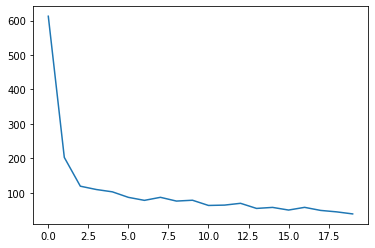

In [ ]:
plt.plot(trained_model.history['loss'])
plt.show()

In [ ]:
# testing

y_pred = model.predict(X_test_ss)

In [ ]:
mean_squared_error(y_test,y_pred)

70.41775289716273

In [ ]:
mean_absolute_error(y_test,y_pred)

6.396318976850795

In [ ]:
# rmse
np.sqrt(mean_squared_error(y_test,y_pred))

8.391528638881162